In [120]:
%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/sinhanushka_/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['norm', 'mean', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab
import csv
import pandas as pd
import zipfile
import sys
import math
import statsmodels.formula.api as smf
import os
import scipy.stats as stats
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from scipy import mean
from scipy.stats import norm
matplotlib.rcParams.update({'font.size': 18})

In [122]:
#Data Input
#Read data from different sources

#1. A CSV file with a header (swim100m.csv). Also show the first 5 data points.
file = open('swim100m.csv', 'r')
to_print = []
for line in file:
    stripped_line = line.strip()
    list1 = stripped_line.split()
    to_print.append(list1)
file.close()
print(to_print[:6])


[['year,time,sex'], ['1905,65.8,M'], ['1908,65.6,M'], ['1910,62.8,M'], ['1912,61.6,M'], ['1918,61.4,M']]


In [123]:
#2. An MS-Excel file (Table 2.8 Waist loss.xls). Show the last five data points.
file = pd.ExcelFile('Table 2.8 Waist loss.xls')
file1 = file.parse(skiprows =2)
file1.tail(5)

,man,before,after
15,16,103.5,103.0
16,17,82.0,80.0
17,18,101.5,101.5
18,19,103.5,102.6
19,20,93.0,93.0


In [124]:
#3. Unzip the folder ‘GLM_data.zip’. Read in the MS-Excel file (Table 2.8 Waist loss.xls from the unzipped folder. Show the first five data points.
with zipfile.ZipFile("GLM_data.zip","r") as file:
    file.extractall("GLM_data")
    
sys.path.insert(1, 'user/sinhanushka_/python/hw1/GLM_data/GLM_data')
file = pd.ExcelFile('Table 2.8 Waist loss.xls')
file1 = file.parse(skiprows =2)
file1.head()

,man,before,after
0,1,100.8,97.0
1,2,102.0,107.5
2,3,105.9,97.0
3,4,108.0,108.0
4,5,92.0,84.0


In [125]:
#4. First steps with Pandas

#1.Generate a pandas DataFrame, with the x-column time stamps from 0 to 10s, at a rate of 10 Hz, 
#the y-column data values with a sine with 1.5 Hz, and z-column the corresponding cosine values. 
#Label the x-column “Time”, and the y-column “YVals”, and the z-column “ZVals”.

rate = 10
dt = 1/rate
freq = 1.5
# Derived quantities
omega = 2*np.pi*freq

# Generate the data
t = np.arange(0,10,dt)
y = np.sin(omega*t)
z = np.cos(omega*t)
# Assemble them in a DataFrame
df = pd.DataFrame({'Time':t, 'YVals':y, 'ZVals':z}) # Show the top 5 values
# Save lines 10-15 of the y- and z-values to an outfile

df


,Time,YVals,ZVals
0,0.0,0.000000,1.000000e+00
1,0.1,0.809017,5.877853e-01
2,0.2,0.951057,-3.090170e-01
3,0.3,0.309017,-9.510565e-01
4,0.4,-0.587785,-8.090170e-01
...,...,...,...
95,9.5,1.000000,8.819314e-15
96,9.6,0.587785,-8.090170e-01
97,9.7,-0.309017,-9.510565e-01
98,9.8,-0.951057,-3.090170e-01


In [126]:
#2. Show the head of this DataFrame.
df.head(5)


,Time,YVals,ZVals
0,0.0,0.000000,1.000000
1,0.1,0.809017,0.587785
2,0.2,0.951057,-0.309017
3,0.3,0.309017,-0.951057
4,0.4,-0.587785,-0.809017


In [127]:
#3. Extract the data in lines 10-15 from “YVals” and “ZVals”, and write them to the file “out.txt”.
outfile = 'out.txt'
df[10:16][['YVals', 'ZVals']].to_csv(outfile) 
df.head()


# print('Data written to {0}'.format(outfile)) 
# input('Done')

# l =[]
# for i in range(6):
#     l.append([YVals[10+i] , ZVals[10+i]])
# np.savetxt(outFile, l , header="\n".join(['Extracting data in lines 10-15 in YVals and ZVals ' , "YVals ZVals"]), encoding=None)

# my_file = open('out.txt')
# my_file
# my_file.read()
# my_file.close()



,Time,YVals,ZVals
0,0.0,0.000000,1.000000
1,0.1,0.809017,0.587785
2,0.2,0.951057,-0.309017
3,0.3,0.309017,-0.951057
4,0.4,-0.587785,-0.809017


In [128]:
#4. Let the user know where the data have been written to.
os.getcwd()

'/Users/sinhanushka_/python/hw1'

In [129]:
#5. Data Display

#1.Read in the data from ‘babyboom.dat.txt’, name the columns: ‘TOB’, ‘sex’, ‘Weight’, ‘Minutes’
Dict = {"TOB":[] , "sex":[] , "Weight" :[] , "Minutes":[]}
f = open("babyboom.dat.txt" , "r")
for line in f:
    line = line.strip()
    line = line.split()
    Dict["TOB"].append(line[0])
    Dict["sex"].append(line[1])
    Dict["Weight"].append(line[2])
    Dict["Minutes"].append(line[3])
f.close()  


for key in Dict.keys():
    if key!= "sex":
        Dict[key] = [int(i) for i in Dict[key]]
new_df = pd.DataFrame(Dict)
df = pd.DataFrame(Dict)


# df = pd.read_csv("babyboom.dat.txt", delimiter=',', header = None)
# column_names = ['TOB', 'sex', 'weight',  'Minutes']
# df.columns = column_names

print(df)

     TOB sex  Weight  Minutes
0      5   1    3837        5
1    104   1    3334       64
2    118   2    3554       78
3    155   2    3838      115
4    257   2    3625      177
5    405   1    2208      245
6    407   1    1745      247
7    422   2    2846      262
8    431   2    3166      271
9    708   2    3520      428
10   735   2    3380      455
11   812   2    3294      492
12   814   1    2576      494
13   909   1    3208      549
14  1035   2    3521      635
15  1049   1    3746      649
16  1053   1    3523      653
17  1133   2    2902      693
18  1209   2    2635      729
19  1256   2    3920      776
20  1305   2    3690      785
21  1406   1    3430      846
22  1407   1    3480      847
23  1433   1    3116      873
24  1446   1    3428      886
25  1514   2    3783      914
26  1631   2    3345      991
27  1657   2    3034     1017
28  1742   1    2184     1062
29  1807   2    3300     1087
30  1825   1    2383     1105
31  1854   2    3428     1134
32  1909  

Text(0, 0.5, 'Weight [g]')

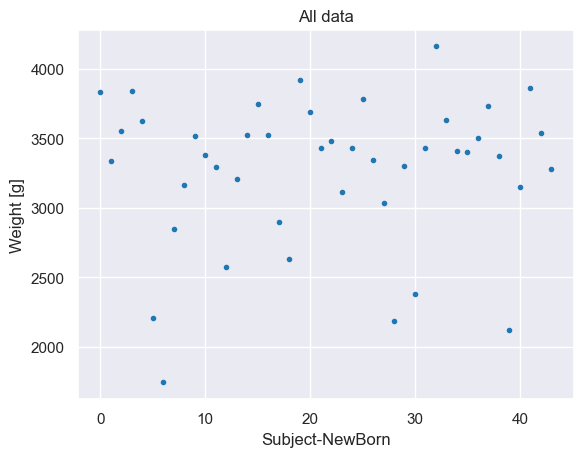

In [130]:
#2. Inspect them visually, and give a numerical description of the data.

#1. Plot ‘Weight’ with title ‘All data’, xlabel ‘Subject-NewBorn’, ylabel ‘Weight [g]’.

plt.plot(df["Weight"], '.')
plt.title('All data')
plt.xlabel('Subject-NewBorn')
plt.ylabel('Weight [g]')


In [131]:
#2. For column “sex”, Replace “1/2” with “female/male”, 
l = []
for i in (Dict["sex"]):
    if i == '1':
        l.append("female")
    elif i == '2':
        l.append("male")

Dict["sex"] = l
for key in Dict.keys():
    if key!= "sex":
        Dict[key] = [int(i) for i in Dict[key]]
new_df = pd.DataFrame(Dict)

print(new_df)




     TOB     sex  Weight  Minutes
0      5  female    3837        5
1    104  female    3334       64
2    118    male    3554       78
3    155    male    3838      115
4    257    male    3625      177
5    405  female    2208      245
6    407  female    1745      247
7    422    male    2846      262
8    431    male    3166      271
9    708    male    3520      428
10   735    male    3380      455
11   812    male    3294      492
12   814  female    2576      494
13   909  female    3208      549
14  1035    male    3521      635
15  1049  female    3746      649
16  1053  female    3523      653
17  1133    male    2902      693
18  1209    male    2635      729
19  1256    male    3920      776
20  1305    male    3690      785
21  1406  female    3430      846
22  1407  female    3480      847
23  1433  female    3116      873
24  1446  female    3428      886
25  1514    male    3783      914
26  1631    male    3345      991
27  1657    male    3034     1017
28  1742  fema

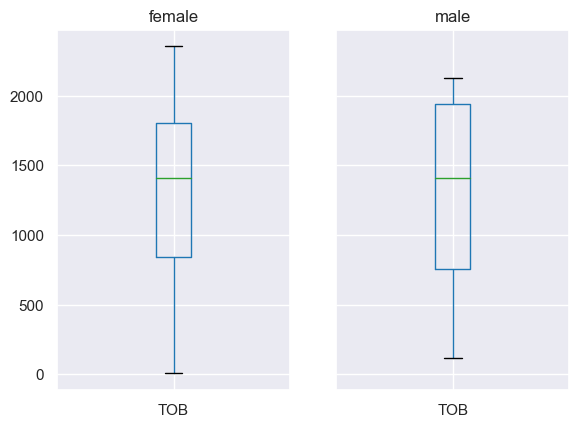

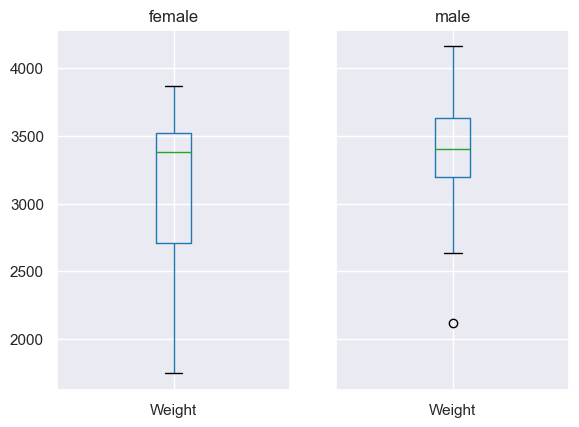

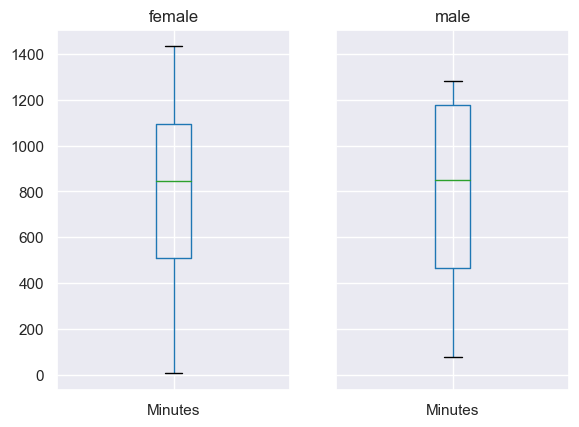

In [132]:
#and show the grouped plots
for key in new_df.keys():
    if key !="sex":
        data = pd.DataFrame({key : new_df[key] , "sex":new_df["sex"]})
        grouped = data.groupby("sex")
        grouped.boxplot()
        plt.show()

In [133]:
#3. Group by “sex” and display statistical information numerically using pandas.DataFrame.describe (Hint: grouping is discussed in Chapter 2 (2.5.2))
grouped = new_df.groupby("sex")
print(grouped.describe())


         TOB                                                                   \
       count         mean         std    min     25%     50%      75%     max   
sex                                                                             
female  18.0  1273.000000  737.695218    5.0  837.75  1406.5  1804.25  2355.0   
male    26.0  1311.923077  670.722412  118.0  754.25  1409.5  1937.50  2123.0   

       Weight               ...                  Minutes              \
        count         mean  ...      75%     max   count        mean   
sex                         ...                                        
female   18.0  3132.444444  ...  3517.25  3866.0    18.0  773.000000   
male     26.0  3375.307692  ...  3628.75  4162.0    26.0  799.615385   

                                                          
               std   min     25%    50%      75%     max  
sex                                                       
female  446.050775   5.0  507.75  846.5  1094.25  1435.0

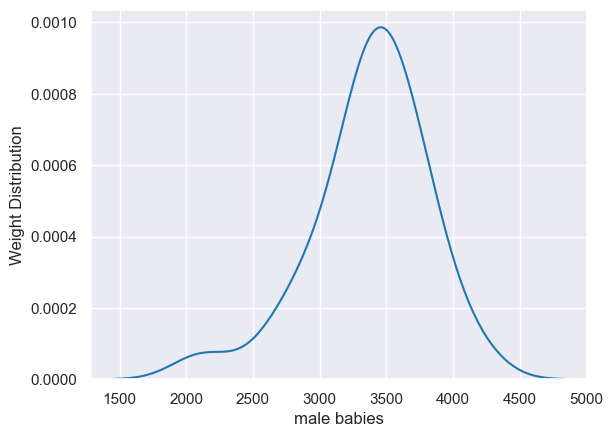

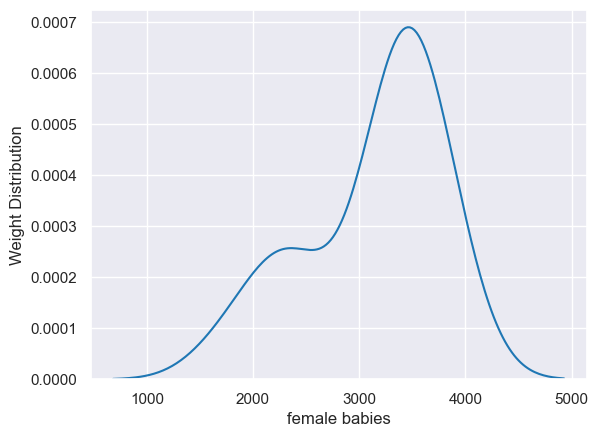

In [134]:
#4. Create two kde-plots, one for the Weight distribution of male babies and one female babies.
w_female = []
w_male = []
for row in new_df.itertuples():
    if row[2] == "male":
        w_male.append(row[3])
    else:
        w_female.append(row[3])

sns.kdeplot(w_male)
plt.xlabel('male babies')
plt.ylabel('Weight Distribution')
plt.show()
sns.kdeplot(w_female)
plt.xlabel('female babies')
plt.ylabel('Weight Distribution')
plt.show()

In [135]:
#3. Are the data normally distributed for the weight of males and females? (Hint: stats.normaltest)

_, pVal = stats.normaltest(w_male)
print(f"pVal for males is {pVal}")


if pVal > 0.05:
    print('Data are probably normally distributed')
else:
    print('Data are probably not normally distributed.')

_, pVal = stats.normaltest(w_female)
print(f"pVal for females is {pVal}")


if pVal > 0.05:
    print('Data are probably normally distributed')
else:
    print('Data are probably not normally distributed.')


pVal for males is 0.02287917589120297
Data are probably not normally distributed.
pVal for females is 0.2036809963294718
Data are probably normally distributed


/Users/sinhanushka_/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [136]:
#6. Sample Standard Deviation

#Create a NumPy-array, containing the data 1,2,3,…,10. Calculate mean and sample standard deviation. 
#Note: Please refer to page 94 of the textbook for the calculation of sample standard deviation.

data = np.arange(1,11)
std1 = np.std(data)
print(f"Sample Standard deviation is {std1}")
mean1 = mean(data)
print(f"Mean is {mean1}")

Sample Standard deviation is 2.8722813232690143
Mean is 5.5


/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_15339/1426984851.py:9: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean1 = mean(data)


In [137]:
#The PDF, CDF, SF, PPF, ISF for normal distribution

#1. With scipy stats, create a normal distribution with location 5, scale 3
# x = np.linspace(-10,10,201)
distr = stats.norm(loc = 5, scale = 3)




# def showDistribution(d1, d2, tTxt, xTxt, yTxt, legendTxt, xmin=-10, xmax=10):
#     '''Utility function to show the distributions, and add labels and title.'''
#     plt.plot(x, d1.pdf(x))
#     if d2 != '':
#         plt.plot(x, d2.pdf(x), 'r')
#         plt.legend(legendTxt)
#     plt.xlim(xmin, xmax)
#     plt.title(tTxt)
#     plt.xlabel(xTxt)
#     plt.ylabel(yTxt)
#     plt.show() 

# showDistribution(stats.norm, stats.norm(loc=5, scale=3),
#                  'Normal Distribution', 'Z', 'P(Z)','')



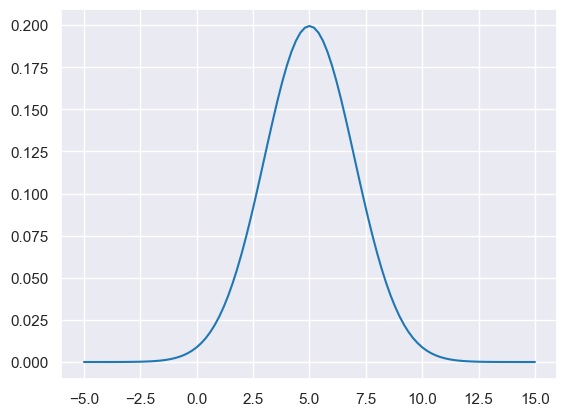

In [138]:
#2. Make the linespce for x from -5 to 15 with 101 intervals
# Generate the data
x = np.linspace(-5,15,101)
#x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate
x2 = np.r_[0:1:0.001]


# Plot a normal distribution: "Probability density functions"
myMean = 5
mySD = 2
y = stats.norm(myMean, mySD).pdf(x)
plt.plot(x,y)
plt.show()

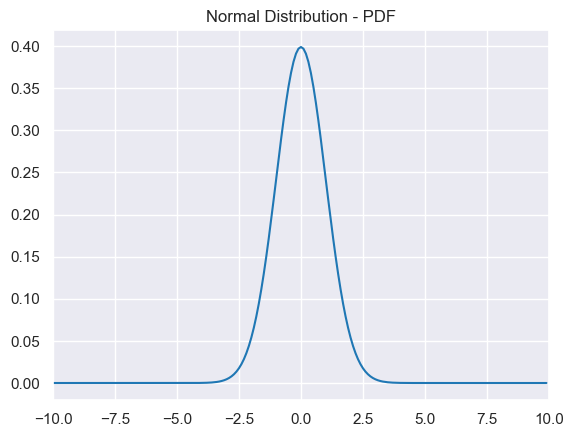

In [139]:
#3. Calculate and plot the corresponding PDF as a function of x
#ax = plt.subplot2grid((3,2),(0,0), colspan=2)

x = np.linspace(-5,15,101)
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate
#x2 = np.r_[0:1:0.001]

plt.plot(x,rv.pdf(x))
plt.xlim([-10,10])
plt.title('Normal Distribution - PDF')
plt.show()

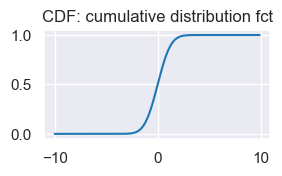

In [140]:
#4. Calculate and plot the corresponding CDF as a function of x

x = np.linspace(-5,15,101)
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate
#x2 = np.r_[0:1:0.001]

plt.subplot(323)
plt.plot(x,rv.cdf(x))

#plt.xlim([-4,4])
plt.title('CDF: cumulative distribution fct')
plt.show()

Text(0.5, 1.0, 'SF: survival fct')

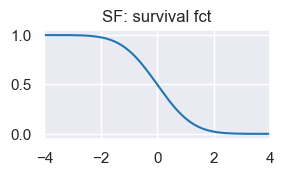

In [141]:
#5. Calculate and plot the corresponding SF as a function of x

x = np.linspace(-5,15,101)
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate
#x2 = np.r_[0:1:0.001]

plt.subplot(324)
plt.plot(x,rv.sf(x))
plt.xlim([-4,4])
plt.title('SF: survival fct')

Text(0.5, 1.0, 'PPF')

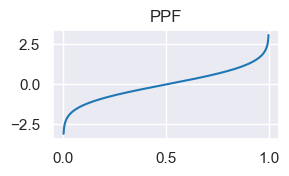

In [142]:
#6. Calculate and plot the corresponding PPF as a function of x

x = np.linspace(-5,15,101)
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate
x2 = np.r_[0:1:0.001]

plt.subplot(325)
plt.plot(x2,rv.ppf(x2))
plt.title('PPF')

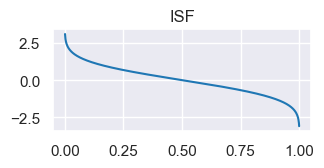

In [143]:
#7. Calculate and plot the corresponding ISF as a function of x

x = np.linspace(-5,15,101)
x = np.r_[-10:10:0.1]
rv = stats.norm(0,1)   # random variate
x2 = np.r_[0:1:0.001]

plt.subplot(326)
plt.plot(x2,rv.isf(x2))
plt.title('ISF')
plt.tight_layout()
plt.show()